In [1]:
# This dataset is for sensor outdoor and paired with stationary and weather.
# the result should be compared with project_pipeline_ver1

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
Wearable = pd.read_excel('~/CSE193/Data_Folder/Demo5_1/5_1_Wearable_Outside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('~/CSE193/Data_Folder/Demo5_1/5_1_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('~/CSE193/Data_Folder/Demo5_1/weather_5_01.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [3]:
Stationary = Stationary.iloc[1:15389,:]
Wearable = Wearable.iloc[:602,:]
Weather = Weather.iloc[24:3585,:]

In [4]:
from datetime import datetime
Stationary = Stationary.resample('1T',on='TimeStamp').mean()

In [5]:
Weather.index = range(Weather.shape[0])

In [6]:
Weather

,DTime,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar
0,2019-05-01 08:45:01,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162
1,2019-05-01 08:45:12,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162
2,2019-05-01 08:45:22,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162
3,2019-05-01 08:45:32,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162
4,2019-05-01 08:45:42,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,165
5,2019-05-01 08:45:52,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165
6,2019-05-01 08:46:02,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165
7,2019-05-01 08:46:12,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165
8,2019-05-01 08:46:23,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165
9,2019-05-01 08:46:33,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,167


In [7]:
#Wearable.index = range(Wearable.shape[0])
from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'))   

#Weather = Weather.iloc[:3561]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [8]:
Weather

,DTime,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar,New_Time
0,2019-05-01 08:45:01,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162,2019-05-01 08:45:01
1,2019-05-01 08:45:12,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162,2019-05-01 08:45:12
2,2019-05-01 08:45:22,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162,2019-05-01 08:45:22
3,2019-05-01 08:45:32,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,162,2019-05-01 08:45:32
4,2019-05-01 08:45:42,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,6,165,2019-05-01 08:45:42
5,2019-05-01 08:45:52,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165,2019-05-01 08:45:52
6,2019-05-01 08:46:02,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165,2019-05-01 08:46:02
7,2019-05-01 08:46:12,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165,2019-05-01 08:46:12
8,2019-05-01 08:46:23,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,165,2019-05-01 08:46:23
9,2019-05-01 08:46:33,1000.871606,22.777778,40,14.444444,0.000000,0.447039,7,82,0,7,167,2019-05-01 08:46:33


In [9]:
Weather = Weather.resample('1T', on='New_Time').mean()

In [10]:
Weather

,Bar,TempIn,HumIn,TempOut,Wind,Wind10,Wdir,HumOut,RainRate,UV,Solar
New_Time,,,,,,,,,,,
2019-05-01 08:45:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.447039,7.000000,82.000000,0.0,6.166667,163.000000
2019-05-01 08:46:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.447039,7.000000,82.000000,0.0,7.000000,166.000000
2019-05-01 08:47:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.372533,7.000000,82.000000,0.0,7.000000,168.333333
2019-05-01 08:48:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.000000,7.000000,82.000000,0.0,7.000000,169.000000
2019-05-01 08:49:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.000000,7.000000,82.000000,0.0,7.000000,169.000000
2019-05-01 08:50:00,1000.871606,22.777778,40.000000,14.444444,0.000000,0.000000,7.000000,82.000000,0.0,7.000000,169.666667
2019-05-01 08:51:00,1000.871606,22.777778,40.000000,14.444444,0.372533,0.000000,7.000000,82.000000,0.0,7.000000,171.000000
2019-05-01 08:52:00,1000.871606,22.777778,40.000000,14.629630,0.074507,0.000000,7.000000,81.166667,0.0,7.000000,171.000000
2019-05-01 08:53:00,1000.871606,22.777778,40.000000,15.000000,0.000000,0.000000,7.000000,80.833333,0.0,7.000000,173.500000


In [29]:
Wearable.index = range(Wearable.shape[0])

Wearable.drop(columns=['Time(s)'],inplace=True)

Weather.drop(columns=['RainRate'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Wearable.drop(columns=['Time'],inplace=True)

Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])

Stationary = Stationary.fillna(Stationary.mean())
Wearable = Wearable.fillna(method='ffill')
Weather = Weather.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat

In [30]:
Wea_Stat = pd.concat([Weather, Stationary],axis=1)

In [31]:
#y_test.where(y_test > 0)

### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [32]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:10]
X_train_stationary = X_train[:,10:]
X_test_weather = X_test[:,:10]
X_test_stationary = X_test[:,10:]
# Initialising the ANN

model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 10))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(optimizer = adadelta, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
481/481 [==============================] - 1s 1ms/step - loss: 1793933796.1746
Epoch 2/200
481/481 [==============================] - 0s 212us/step - loss: 139665395.7921
Epoch 3/200
481/481 [==============================] - 0s 187us/step - loss: 93449497.7682
Epoch 4/200
481/481 [==============================] - 0s 240us/step - loss: 63111239.7484
Epoch 5/200
481/481 [==============================] - 0s 193us/step - loss: 58700822.2432
Epoch 6/200
481/481 [==============================] - 0s 185us/step - loss: 44370359.5094
Epoch 7/200
481/481 [==============================] - 0s 201us/step - loss: 42849699.0312
Epoch 8/200
481/481 [==============================] - 0s 201us/step - loss: 42344630.2994
Epoch 9/200
481/481 [==============================] - 0s 225us/step - loss: 40706192.9688
Epoch 10/200
481/481 [==============================] - 0s 190us/step - loss: 39327531.9678
Epoch 11/200
481/481 [==============================] - 0s 179us/step - loss: 38111256.4

481/481 [==============================] - 0s 170us/step - loss: 34918578.6632
Epoch 91/200
481/481 [==============================] - 0s 358us/step - loss: 34845425.1809
Epoch 92/200
481/481 [==============================] - 0s 265us/step - loss: 34871404.8150
Epoch 93/200
481/481 [==============================] - 0s 296us/step - loss: 34887289.9588
Epoch 94/200
481/481 [==============================] - 0s 258us/step - loss: 34857578.6289
Epoch 95/200
481/481 [==============================] - 0s 162us/step - loss: 34744812.2365
Epoch 96/200
481/481 [==============================] - 0s 166us/step - loss: 34750149.6351
Epoch 97/200
481/481 [==============================] - 0s 171us/step - loss: 34688255.4802
Epoch 98/200
481/481 [==============================] - 0s 308us/step - loss: 34725185.9018
Epoch 99/200
481/481 [==============================] - 0s 189us/step - loss: 34732316.9658
Epoch 100/200
481/481 [==============================] - 0s 167us/step - loss: 34746356.1830


In [33]:
"""from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)"""


'from sklearn.ensemble import RandomForestRegressor\n\nmodel = RandomForestRegressor()\nmodel.fit(X_train_weather,y_train)'

33579319.59029878


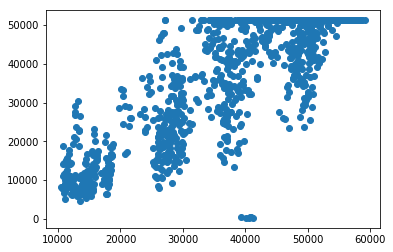

In [34]:
y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse

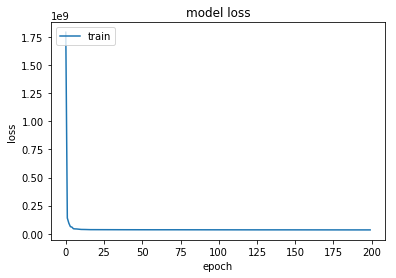

In [35]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Stationary Model 

In [36]:

# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(X_train_stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = sgd , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 16, epochs = 200)

Epoch 1/200
481/481 [==============================] - 0s 1ms/step - loss: nan       
Epoch 2/200
481/481 [==============================] - 0s 274us/step - loss: nan
Epoch 3/200
481/481 [==============================] - 0s 147us/step - loss: nan
Epoch 4/200
481/481 [==============================] - 0s 161us/step - loss: nan
Epoch 5/200
481/481 [==============================] - 0s 139us/step - loss: nan
Epoch 6/200
481/481 [==============================] - 0s 209us/step - loss: nan
Epoch 7/200
481/481 [==============================] - 0s 136us/step - loss: nan
Epoch 8/200
481/481 [==============================] - 0s 150us/step - loss: nan
Epoch 9/200
481/481 [==============================] - 0s 181us/step - loss: nan
Epoch 10/200
481/481 [==============================] - 0s 186us/step - loss: nan
Epoch 11/200
481/481 [==============================] - 0s 175us/step - loss: nan
Epoch 12/200
481/481 [==============================] - 0s 98us/step - loss: nan
Epoch 13/200
481/481 

481/481 [==============================] - 0s 92us/step - loss: nan


In [37]:
"""from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)"""


'from sklearn.datasets import load_boston\nfrom sklearn.linear_model import LinearRegression,Lasso,Ridge\nll = Lasso(alpha=0.1)\nll.fit(X_train_stationary, y_train)\ny_train_test_stationary = ll.predict(X_train_stationary)'

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

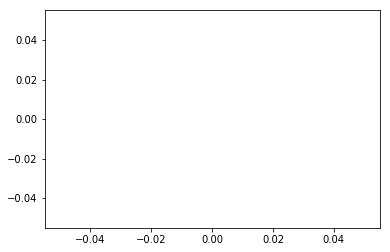

In [38]:
y_train_test_stationary = model2.predict(X_train_stationary)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [ ]:

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [ ]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [39]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6)) 
classifier.compile(optimizer = adadelta, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=500)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/500
481/481 [==============================] - 0s 736us/step - loss: nan
Epoch 2/500
481/481 [==============================] - 0s 154us/step - loss: nan
Epoch 3/500
481/481 [==============================] - 0s 190us/step - loss: nan
Epoch 4/500
481/481 [==============================] - 0s 189us/step - loss: nan
Epoch 5/500
481/481 [==============================] - 0s 171us/step - loss: nan
Epoch 6/500
481/481 [==============================] - 0s 162us/step - loss: nan
Epoch 7/500
481/481 [==============================] - 0s 154us/step - loss: nan
Epoch 8/500
481/481 [==============================] - 0s 172us/step - loss: nan
Epoch 9/500
481/481 [==============================] - 0s 153us/step - loss: nan
Epoch 10/500
481/481 [==============================] - 0s 167us/step - loss: nan
Epoch 11/500
481/481 [==============================] - 0s 129us/step - loss: nan
Epoch 12/500
481/481 [==============================] - 0s 125us/step - loss: nan
Epoch 13/500
481/481 [===

481/481 [==============================] - 0s 146us/step - loss: nan
Epoch 199/500
481/481 [==============================] - 0s 150us/step - loss: nan
Epoch 200/500
481/481 [==============================] - 0s 249us/step - loss: nan
Epoch 201/500
481/481 [==============================] - 0s 186us/step - loss: nan
Epoch 202/500
481/481 [==============================] - 0s 156us/step - loss: nan
Epoch 203/500
481/481 [==============================] - 0s 143us/step - loss: nan
Epoch 204/500
481/481 [==============================] - 0s 145us/step - loss: nan
Epoch 205/500
481/481 [==============================] - 0s 138us/step - loss: nan
Epoch 206/500
481/481 [==============================] - 0s 135us/step - loss: nan
Epoch 207/500
481/481 [==============================] - 0s 161us/step - loss: nan
Epoch 208/500
481/481 [==============================] - 0s 169us/step - loss: nan
Epoch 209/500
481/481 [==============================] - 0s 194us/step - loss: nan
Epoch 210/500
481/

481/481 [==============================] - 0s 147us/step - loss: nan
Epoch 395/500
481/481 [==============================] - 0s 159us/step - loss: nan
Epoch 396/500
481/481 [==============================] - 0s 170us/step - loss: nan
Epoch 397/500
481/481 [==============================] - 0s 228us/step - loss: nan
Epoch 398/500
481/481 [==============================] - 0s 265us/step - loss: nan
Epoch 399/500
481/481 [==============================] - 0s 196us/step - loss: nan
Epoch 400/500
481/481 [==============================] - 0s 178us/step - loss: nan
Epoch 401/500
481/481 [==============================] - 0s 259us/step - loss: nan
Epoch 402/500
481/481 [==============================] - 0s 190us/step - loss: nan
Epoch 403/500
481/481 [==============================] - 0s 223us/step - loss: nan
Epoch 404/500
481/481 [==============================] - 0s 167us/step - loss: nan
Epoch 405/500
481/481 [==============================] - 0s 141us/step - loss: nan
Epoch 406/500
481/

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

In [ ]:
"""y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse """

In [ ]:
# Get the mean absolute error on the validation data
y_pred_weather = model.predict(X_test_weather)
plt.scatter(y_pred_weather,y_test)
mse = mean_squared_error(y_pred_weather, y_test)
plt.title('weather only')
print mse

In [ ]:
explained_variance_score(y_test, y_pred_weather)  

### stationary prediction

In [ ]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = model2.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [ ]:
explained_variance_score(y_test, y_pred_stationary)  

In [ ]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

In [ ]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [ ]:
explained_variance_score(y_test, y_pred)  

In [ ]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

### plot loss history

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

In [ ]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()

### random forest for weather - same mse as MLP

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_weather,y_train)

# Get the mean absolute error on the validation data
y_test_weather = model.predict(X_test_weather)
plt.scatter(y_test_weather,y_test)
mse = mean_squared_error(y_test_weather, y_test)
print mse

In [ ]:
y_train_test_stationary.shape,y_tra